In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('master_data_clean.csv')
df.head()

,Agency Type,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Race,Perpetrator Ethnicity,Weapon Category,Relationship Category,Agency_Type_grouped,Season,Region
0,State Police,Female,26,Native American/Alaska Native,Not Hispanic,Male,Native American/Alaska Native,Not Hispanic,Non-Firearm,Lover,Other Police,Autumn,West Coast
1,Sheriff,Male,23,Black,Not Hispanic,Male,Black,Not Hispanic,Firearm,Acquaintance,Sheriff,Summer,South
2,Sheriff,Male,42,White,Not Hispanic,Female,White,Not Hispanic,Firearm,Lover,Sheriff,Summer,South
3,Sheriff,Male,33,Black,Not Hispanic,Male,Black,Not Hispanic,Firearm,Acquaintance,Sheriff,Summer,South
4,Sheriff,Male,46,White,Not Hispanic,Male,White,Not Hispanic,Firearm,Family,Sheriff,Autumn,South


In [3]:
# 1. Clean Data
categorical_columns = ["Agency Type", "Victim Sex", "Victim Race", 
                       "Victim Ethnicity", "Perpetrator Sex", "Perpetrator Race", 
                       "Perpetrator Ethnicity", "Relationship Category", "Agency_Type_grouped",'Season','Region']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

target_encoder = LabelEncoder()
df["Weapon Category"] = target_encoder.fit_transform(df["Weapon Category"]) 

X = df.drop(columns=["Weapon Category"])
y = df["Weapon Category"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

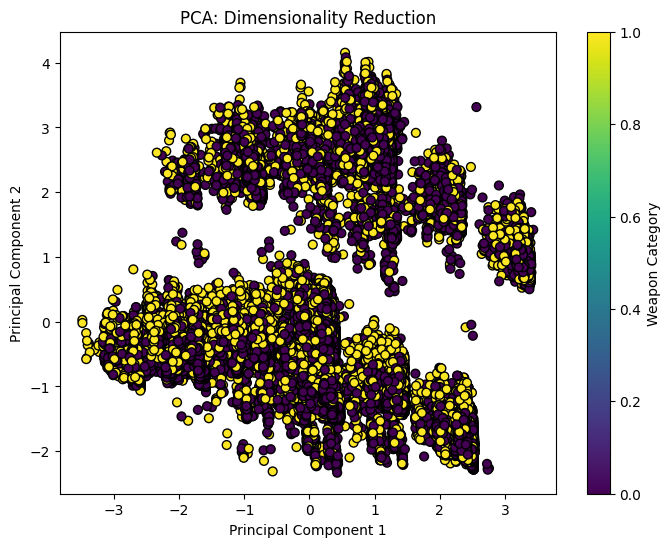

In [4]:
# 2. PCA (Work better on this)

pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization (maybe change this)
X_pca = pca.fit_transform(X_scaled)

# Plot the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis", edgecolor="k", s=40)
plt.title("PCA: Dimensionality Reduction")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Weapon Category")
plt.show()

In [5]:
# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
X_train

array([[-0.49210838,  0.57046087,  0.05010832, ..., -0.5582741 ,
        -0.4612122 ,  0.30913233],
       [-0.49210838,  0.57046087,  2.20792902, ..., -0.5582741 ,
         1.34925088,  0.30913233],
       [ 1.56027486,  0.57046087, -0.84898364, ...,  1.90357412,
        -1.36644374,  0.30913233],
       ...,
       [ 1.56027486,  0.57046087,  1.00913974, ...,  1.90357412,
        -0.4612122 ,  0.30913233],
       [-0.49210838,  0.57046087, -0.48934686, ..., -0.5582741 ,
         0.44401934,  0.93399022],
       [ 1.56027486, -1.75272211,  0.34980564, ...,  1.90357412,
         0.44401934,  0.30913233]])

In [7]:
X_train.shape[1]

12

In [8]:
# 4. Build and Train the ANN Model
model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=1)

Epoch 1/50


C:\Users\patbr\PycharmProjects\sandbox_2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12283/12283 ━━━━━━━━━━━━━━━━━━━━ 10s 740us/step - accuracy: 0.6778 - loss: 0.6084 - val_accuracy: 0.6917 - val_loss: 0.5917
Epoch 2/50
12283/12283 ━━━━━━━━━━━━━━━━━━━━ 9s 748us/step - accuracy: 0.6968 - loss: 0.5845 - val_accuracy: 0.7006 - val_loss: 0.5863
Epoch 3/50
12283/12283 ━━━━━━━━━━━━━━━━━━━━ 9s 729us/step - accuracy: 0.7028 - loss: 0.5800 - val_accuracy: 0.7018 - val_loss: 0.5810
Epoch 4/50
12283/12283 ━━━━━━━━━━━━━━━━━━━━ 10s 780us/step - accuracy: 0.7067 - loss: 0.5751 - val_accuracy: 0.6982 - val_loss: 0.5811
Epoch 5/50
12283/12283 ━━━━━━━━━━━━━━━━━━━━ 9s 715us/step - accuracy: 0.7087 - loss: 0.5706 - val_accuracy: 0.7021 - val_loss: 0.5800
Epoch 6/50
12283/12283 ━━━━━━━━━━━━━━━━━━━━ 9s 709us/step - accuracy: 0.7091 - loss: 0.5729 - val_accuracy: 0.7024 - val_loss: 0.5791
Epoch 7/50
12283/12283 ━━━━━━━━━━━━━━━━━━━━ 9s 702us/step - accuracy: 0.7054 - loss: 0.5749 - val_accuracy: 0.7014 - val_loss: 0.5824
Epoch 8/50
12283/12283 ━━━━━━━━━━━━━━━━━━━━ 9s 714us/step - accuracy: 0

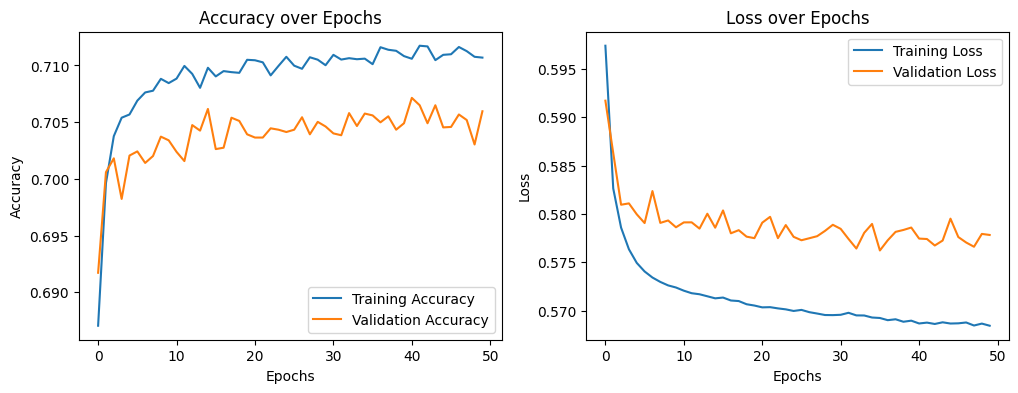

In [9]:
# 5. Evaluate the Model
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix and Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))

960/960 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
Confusion Matrix:
[[19367  1234]
 [ 7693  2413]]

Classification Report:
              precision    recall  f1-score   support

     Firearm       0.72      0.94      0.81     20601
 Non-Firearm       0.66      0.24      0.35     10106

    accuracy                           0.71     30707
   macro avg       0.69      0.59      0.58     30707
weighted avg       0.70      0.71      0.66     30707


Results explanation provided by ChatGPT:

Here’s a simple explanation of your model's performance based on the output:
Confusion Matrix:

The confusion matrix shows how well the model is classifying each category:

    [19289 1312]:
        19,289 "Firearm" cases were correctly classified (True Positives).
        1,312 "Firearm" cases were incorrectly classified as "Non-Firearm" (False Negatives).
    [7788 2318]:
        7,788 "Non-Firearm" cases were incorrectly classified as "Firearm" (False Positives).
        2,318 "Non-Firearm" cases were correctly classified (True Negatives).

Classification Report:

    Precision: The proportion of predicted positive cases that are actually correct.
        Firearm: 71% of cases predicted as "Firearm" were correct.
        Non-Firearm: 64% of cases predicted as "Non-Firearm" were correct.

    Recall (Sensitivity): The proportion of actual positive cases that were correctly identified.
        Firearm: The model correctly identified 94% of the actual "Firearm" cases.
        Non-Firearm: The model correctly identified only 23% of the actual "Non-Firearm" cases. This is low, meaning many "Non-Firearm" cases were misclassified as "Firearm."

    F1-Score: The harmonic mean of precision and recall (a balance between the two).
        Firearm: 0.81 indicates good performance for the "Firearm" category.
        Non-Firearm: 0.34 indicates poor performance for the "Non-Firearm" category.

    Support: The number of actual cases for each category.
        "Firearm": 20,601 cases.
        "Non-Firearm": 10,106 cases.

Overall Metrics:

    Accuracy (70%): The model correctly classified 70% of all cases.
    Macro Average:
        Precision, recall, and F1-score averaged equally for both classes, giving a score of 0.68, 0.58, and 0.57 respectively.
    Weighted Average:
        Accounts for the imbalance in the dataset by giving more weight to the majority class ("Firearm"). Hence, the weighted averages are slightly better.

Summary:

    The model performs well for the "Firearm" category, with high recall (94%) and a good F1-score (0.81).
    However, the model struggles with the "Non-Firearm" category, as evidenced by the low recall (23%) and F1-score (0.34).
    This imbalance suggests the model may need further tuning or rebalancing to handle the minority class ("Non-Firearm") better.

Suggestions for Improvement:

    Handle Class Imbalance:
        Use techniques like oversampling the "Non-Firearm" class (SMOTE) or undersampling the "Firearm" class.
        Apply class weighting in the loss function to penalize incorrect predictions for "Non-Firearm" more heavily.
    Feature Engineering:
        Investigate if additional features can improve separability between the classes.
    Hyperparameter Tuning:
        Optimize the ANN architecture (e.g., more neurons, layers, or different activation functions).
    Advanced Models:
        Explore ensemble methods like Random Forest or Gradient Boosted Trees, which may perform better with imbalanced data.

Would you like detailed help with any of these strategies?